In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [84]:
data = pd.read_csv("Housing.csv")
print(data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [85]:
print("Checking datatypes and null values \n")
print(data.info())

Checking datatypes and null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [86]:
numerical = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
target = 'price'

X = data[numerical + categorical]
y = data[target]

print("Predictor data\n", X)
print("Response data\n", y)


Predictor data
      area  bedrooms  bathrooms  stories  parking mainroad guestroom basement  \
0    7420         4          2        3        2      yes        no       no   
1    8960         4          4        4        3      yes        no       no   
2    9960         3          2        2        2      yes        no      yes   
3    7500         4          2        2        3      yes        no      yes   
4    7420         4          1        2        2      yes       yes      yes   
..    ...       ...        ...      ...      ...      ...       ...      ...   
540  3000         2          1        1        2      yes        no      yes   
541  2400         3          1        1        0       no        no       no   
542  3620         2          1        1        0      yes        no       no   
543  2910         3          1        1        0       no        no       no   
544  3850         3          1        2        0      yes        no       no   

    hotwaterheating air

In [99]:
data_encoded = pd.get_dummies(data, columns=categorical, drop_first=True)
correlation_matrix = data_encoded.corr()

price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print(price_correlation)

threshold = 0

selected_features = price_correlation[abs(price_correlation) > threshold]
selected_features = selected_features.drop('price') 
print("\nSelected features\n", selected_features)

X = data_encoded[selected_features.index]
print("\nUpdated predictor values\n",X)

price                              1.000000
area                               0.535997
bathrooms                          0.517545
airconditioning_yes                0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_yes                       0.329777
mainroad_yes                       0.296898
guestroom_yes                      0.255517
basement_yes                       0.187057
hotwaterheating_yes                0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64

Selected features
 area                               0.535997
bathrooms                          0.517545
airconditioning_yes                0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_yes                       0.329777
mainroad_yes                

In [100]:
#Standardization. Subtract the numerical features by their mean values and divide by their standard deviation
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[ 1.04672629  1.42181174  1.4726183  ... -0.2192645  -0.84488844
  -0.6964292 ]
 [ 1.75700953  5.40580863  1.4726183  ... -0.2192645  -0.84488844
  -0.6964292 ]
 [ 2.21823241  1.42181174 -0.67906259 ... -0.2192645   1.18358821
  -0.6964292 ]
 ...
 [-0.70592066 -0.57018671 -0.67906259 ... -0.2192645  -0.84488844
   1.43589615]
 [-1.03338891 -0.57018671 -0.67906259 ... -0.2192645  -0.84488844
  -0.6964292 ]
 [-0.5998394  -0.57018671 -0.67906259 ... -0.2192645  -0.84488844
   1.43589615]]


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [102]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficients\n", model.coef_)
print("\nIntercept\n", model.intercept_)


Coefficients
 [ 542942.01498301  451483.70219742  303937.31515767  333118.75503399
  219431.02486862   75641.99300606  192873.30119447  133559.33473403
  132366.83783747  200165.78211695  154309.58715201  -76027.5597365
 -225830.26283935]

Intercept
 4732817.413606298


In [103]:
#Make predictions with testing data
y_pred = model.predict(X_test)

#Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)


Mean Squared Error: 1506230725917.4565
Mean Absolute Error: 902975.6419842101
R^2 Score: 0.675496808516109


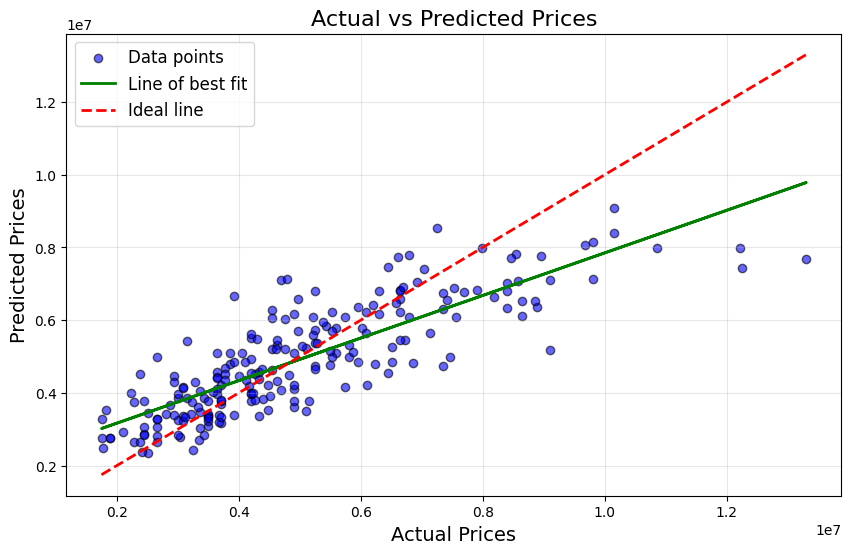

In [104]:
y_pred = model.intercept_ + np.dot(X_test, model.coef_)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b', edgecolor='k', label='Data points')

slope, intercept_line = np.polyfit(y_test, y_pred, 1)
best_fit_line = slope * np.array(y_test) + intercept_line
plt.plot(y_test, best_fit_line, color='g', linestyle='-', linewidth=2, label='Line of best fit')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--', linewidth=2, label='Ideal line')

plt.xlabel("Actual Prices", fontsize=14)
plt.ylabel("Predicted Prices", fontsize=14)
plt.title("Actual vs Predicted Prices", fontsize=16)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()